## SKLEARN DATACAMP TUTORIAL

### Extracting data from Iris dataset in scikit-learn

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# load iris dataset
iris = datasets.load_iris()

In [2]:
# dataset type is bunch (like a dictionary)
type(iris)

sklearn.utils.Bunch

In [3]:
# looking at the structure of the 'Bunch'
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
# checking keys
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
# both feature & target data are provided as numpy arrays
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [6]:
# shape returns 150 rows, 4 columns
iris.data.shape

(150, 4)

In [7]:
# target names are encoded as 0 for 'setosa' 1 for 'versicolor' and 2 for 'virginica'; returned with .target_names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Exploratory Data Analysis

In [8]:
# extract feature, target data
X = iris.data
y = iris.target

# convert feature data to dataframe
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


### Visual EDA

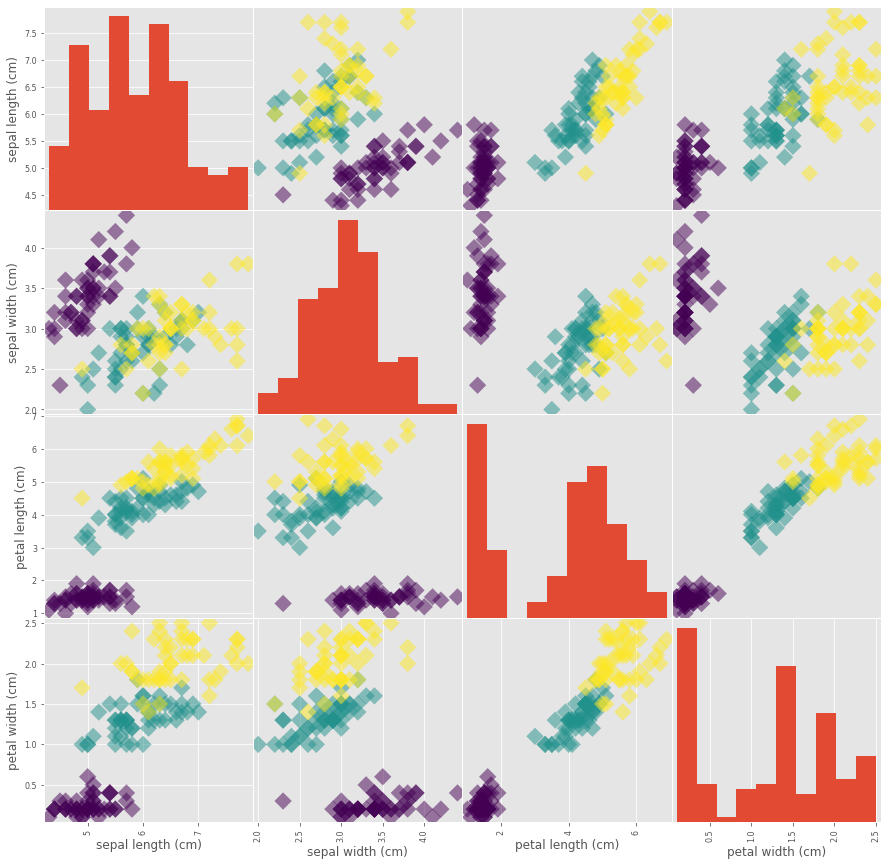

In [9]:
_ = pd.plotting.scatter_matrix(df, c = y, figsize = [15, 15], s=150, marker='D')

# using sns.countplot when data is binary and can be counted
    plt.figure()
    sns.countplot(x=[feature string], hue=[target string], data=df, palette='RdBu')
    plt.xticks([0,1], ['No', 'Yes'])
    plt.show()

## Fitting, Predicting a Classifier

### Fitting a Classifier

In [10]:
# import classifier
from sklearn.neighbors import KNeighborsClassifier

# instantiate classifier
knn = KNeighborsClassifier(n_neighbors=6)

# fit classifier to our training set passing 2 args: features as numpy array and 'labels' (target) as numpy array
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

### Predicting on unlabeled data

In [11]:
# 'new data'
X_new = np.array([[5.6, 2.8, 3.9, 1.1],
                 [5.7, 2.6, 3.8, 1.3],
                 [4.7, 3.2, 1.3, 0.2]])

# predict the data with model
prediction = knn.predict(X_new)

# since the shape is (3, 4), we expect the prediction to return an array of 3 'predictions' corresponding to the number of observations input into the model
X_new.shape

(3, 4)

In [12]:
# checking the prediction
print('Prediction: {}'.format(prediction))

Prediction: [1 1 0]


## Measuring Model Performance
Accuracy is one metric used to measure classification performance.

Accuracy is the number of correct predictions over the total number of data points.

### Train/Test

In [13]:
# import train_test_split
from sklearn.model_selection import train_test_split

# use function to randomly split data
# test_size= specifies what % of data is used for test set (default is 75/25 train/test)
# stratify is used to identify the list or array that contains the labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

# instantiate classifier
knn = KNeighborsClassifier(n_neighbors=8)

# fit classifier
knn.fit(X_train, y_train)

# predict the test set using the trained model
y_pred = knn.predict(X_test)

# output predictions
print("Test set predictions:\n{}".format(y_pred))

Test set predictions:
[2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


## Check Accuracy
To check the accuracy we use the `.score()` method

In [14]:
# check accuracy with .score()
knn.score(X_test, y_test)

0.9555555555555556

### Notes on Model Complexity with Knn
> Larger k = smoother decision boundary = less complex model
> 
> Smaller k = more complex model = can lead to overfitting

## Introduction to Regression
Note: In practice, we will usually never use linear regression, 'out of the box,' like this; typically first we will use REGULARIZATION (which places further constraints on model coefficients).

Our goal is to take a first step here in using regularized linear models.

In [15]:
# import data
boston = pd.read_csv('./data/boston.csv')

print(boston.head())

      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [16]:
# create feature, target arrays
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

In [17]:
# Predicting house value from a SINGLE FEATURE: rooms
X_rooms = X[:,5]
print(X_rooms[0:10])
type(X_rooms), type(y)

[6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004]


(numpy.ndarray, numpy.ndarray)

In [18]:
# Reshape into a 'column' array (i.e. 1D array)
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)
print(X_rooms[0:10])

[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]
 [6.43 ]
 [6.012]
 [6.172]
 [5.631]
 [6.004]]


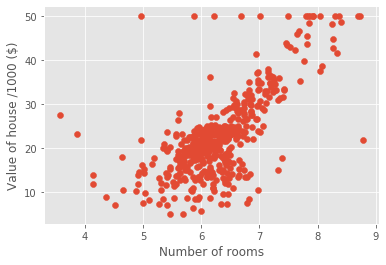

In [19]:
# plotting house values vs. number of rooms
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

### Fitting a Regression Model

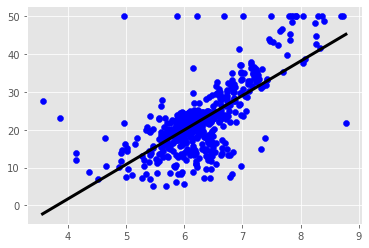

In [20]:
# import libraries
import numpy as np
from sklearn.linear_model import LinearRegression

# instantiate regression model
reg = LinearRegression()

# fit regression model to data
reg.fit(X_rooms, y)

# review prediction over range of data
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)

# plot the lin reg line with the scatter
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()

## Linear Regression on All (Multiple) Features

In [21]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# create feature, target arrays
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

# Reshape into a 'column' array (i.e. 1D array)
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

# split into train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# instantiate the regressor
reg_all = LinearRegression()

# fit algorithm
reg_all.fit(X_train, y_train)

# predict
y_pred = reg_all.predict(X_test)

### Scoring Regression: R-Squared

R-square quantifies the amount of variance in the target variable that is predicted from the feature variables.

In [22]:
# compute r-squared on linear regression model with .score()
reg_all.score(X_test, y_test)

0.7112260057484929

### Cross-validation in scikit-learn on linear regression

In [23]:
# import libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# instantiate model
reg = LinearRegression()

# 5-fold cross val (Default score reported is R-squared)
cv_results = cross_val_score(reg, X, y, cv=5)

# print scores
print(cv_results)

# print avg
print("Average 5-Fold CV Score: {}".format(np.mean(cv_results)))

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
Average 5-Fold CV Score: 0.35327592439588074


### Timing Different k-fold Cross-validation times vary on k

In [24]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
%timeit cross_val_score(reg, X, y, cv=3)
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
%timeit cross_val_score(reg, X, y, cv=10)
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

6.62 ms ± 615 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
-1.5841985220997392
21.6 ms ± 2.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
0.20252899006055464


### Regularized Regression
Recall: Linear regression **minimizes a *loss function*** to choose a coefficient for each feature variable. Large coefficients can lead to overfitting. Because of this, it is common practice to **alter the loss function** so that it penalizes for large coefficients. This is called ***Regularization.***

**Ridge Regression**    
Loss function = OLS loss function + the squared value of each coefficient multiplied by some constant alpha.
- Alpha will be a parameter we need to choose
- Picking alpha here is similar to picking k in k-NN

This is called **Hyperparameter tuning.**

### Ridge Regression in scikit-learn
Note: Setting `normalize=` to True ensures all variables are on the same scale


In [25]:
# import ridge model
from sklearn.linear_model import Ridge

# train, test split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# instantiate model
ridge = Ridge(alpha=0.1, normalize=True)

# fit
ridge.fit(X_train, y_train)

# predict
ridge_pred = ridge.predict(X_test)

# score
ridge.score(X_test, y_test)

0.6996938275127313

### Lasso Regression
Lasso can be used to select important features of a dataset, since it 'shrinks' the coefficients of less important features to exactly 0.

In [26]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.595022953532855

### Using Lasso for features selection in scikit-learn

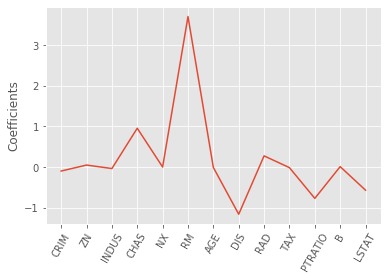

In [27]:
# import lasso model
from sklearn.linear_model import Lasso

# 
names = boston.drop('MEDV', axis=1).columns

# instantiate model
lasso = Lasso(alpha=0.1)

# fit model, compute coefficients with .coef_
lasso_coef = lasso.fit(X, y).coef_

# plot 
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

## How good is the model
Classification metrics:
- Measuring model performance with accuracy:
 - Fraction of correctly classified samples
 - Not always a useful metric
 
Class imbalance example: emails. A model predicts every email as not spam. When 99% of emails are not spam, the output appears like the model is 99% accurate, but it is not.

### Diagnosing classification predictions
- Confusion matrix

### Metrics from the Confusion Matrix
- Precision
- Recall (Sensitivity)
- F1score

Assumptions:
- High precision: Not many real emails predicted as spam
- High recall: Predicted most spam emails correctly

### Computing a confusion matrix

In [28]:
# imports
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# instantiate classifier
knn = KNeighborsClassifier(n_neighbors=8)

# train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit model
knn.fit(X_train, y_train)

# predict model
y_pred = knn.predict(X_test)

C:\Users\james\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


ValueError: Unknown label type: 'continuous'